In [1]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from GIN_jsspenv import GIN_JsspEnv
from agent import PPO
import warnings
warnings.filterwarnings('ignore')

In [14]:
def test_agents_on(sizes, instances, return_action_lists=False):
    # For agents trained on single size, agents are specified by SIZE
    df = pd.DataFrame()
    action_lists = []
    for size in sizes:
        num_jobs, num_machines = size
        policy_dir = f"saved_policies/train_single_size_on_{num_jobs}_{num_machines}"

        device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
        agent = PPO(device)
        agent.load(policy_dir)
        
        actions_this_agent = []
        makespan_this_agent = []
        for instance in instances:
            env = GIN_JsspEnv(instance)
            env.seed(0)
            state = env.reset()
            done = False
            episode_return = 0
            actions_on_this_instance = []
            while not done:
                action = agent.take_action(state, determinstic=True)
                next_state, reward, done, info = env.step(action)
                state = next_state
                episode_return += reward
                actions_on_this_instance.append(action)
            actions_this_agent.append(actions_on_this_instance)    
                
            makespan_this_agent.append(info["makespan"])
        df[str(size)] = makespan_this_agent
        action_lists.append(actions_this_agent)
    if return_action_lists:
        return df, action_lists
    else:
        return df

In [15]:
policy_dir = f"saved_policies/train_single_size_on_6_6_num_episodes_per_env=10"

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
agent = PPO(device)
agent.load(policy_dir)

instances = ["ft06", "la01", "la06", "la11", "la21", "la31", "la36", "orb01", "swv01", "swv06", "swv11", "yn1"]
actions_this_agent = []
makespan_this_agent = []
for instance in instances:
    env = GIN_JsspEnv(instance)
    env.seed(0)
    state = env.reset()
    done = False
    episode_return = 0
    actions_on_this_instance = []
    while not done:
        action = agent.take_action(state, determinstic=True)
        next_state, reward, done, info = env.step(action)
        state = next_state
        episode_return += reward
        actions_on_this_instance.append(action)
    actions_this_agent.append(actions_on_this_instance)    
    makespan_this_agent.append(info["makespan"])
makespan_multi_sizes_agent = makespan_this_agent

In [16]:
makespan_this_agent

[79, 1055, 1221, 1762, 1618, 2343, 2102, 1449, 2165, 3088, 5143, 1479]

#### train on multi sizes

In [3]:
policy_dir = f"saved_policies/train_multi_sizes"
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
agent = PPO(device)
agent.load(policy_dir)

instances = ["ft06", "la01", "la06", "la11", "la21", "la31", "la36", "orb01", "swv01", "swv06", "swv11", "yn1"]
actions_this_agent = []
makespan_this_agent = []
for instance in instances:
    env = GIN_JsspEnv(instance)
    env.seed(0)
    state = env.reset()
    done = False
    episode_return = 0
    actions_on_this_instance = []
    while not done:
        action = agent.take_action(state, determinstic=True)
        next_state, reward, done, info = env.step(action)
        state = next_state
        episode_return += reward
        actions_on_this_instance.append(action)
    actions_this_agent.append(actions_on_this_instance)    
    makespan_this_agent.append(info["makespan"])
makespan_multi_sizes_agent = makespan_this_agent

In [12]:
makespan_this_agent

[68, 906, 1217, 1657, 1529, 2883, 1775, 1469, 2103, 3012, 5726, 1418]

#### train on single size

In [4]:
sizes = [(6,6),(10,10),(15,10),(15,15),(20,10),(20,15),(20,20),(30,15),(30,20),(50,20)]   # ,(100,20),(200,50)
instances = ["ft06", "la01", "la06", "la11", "la21", "la31", "la36", "orb01", "swv01", "swv06", "swv11", "yn1"]
df, actions_lists = test_agents_on(sizes=sizes,instances=instances,return_action_lists=True)

<Axes: >

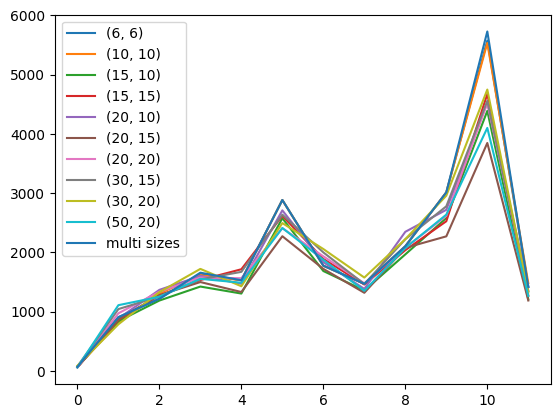

In [10]:
df["multi sizes"] = makespan_multi_sizes_agent
df.plot()

<Axes: >

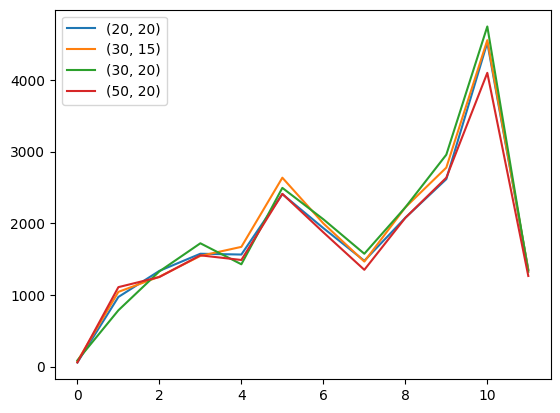

In [11]:
plot_list = [(6,6),(10,10),(15,10),(15,15),(20,10),(20,15),(20,20),(30,15),(30,20),(50,20)]
plot_list = [(20,20),(30,15),(30,20),(50,20)]
plot_list = [str(x) for x in plot_list]
df[plot_list].plot()